In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd= pd.read_csv(r"C:\Users\VIRAJ KAMAT\Desktop\Data Science\Assignments\Random Forest classification\Company_Data (1).csv")
cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
cd.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
cd1 = pd.get_dummies(cd)

In [5]:
cd1['Sales'] = pd.cut(cd1['Sales'], bins=[0,10,np.inf], labels=['low/mid','high'],include_lowest=True)

In [6]:
cd1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,low/mid,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,high,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,high,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,low/mid,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,low/mid,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [7]:
cd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Sales             400 non-null    category
 1   CompPrice         400 non-null    int64   
 2   Income            400 non-null    int64   
 3   Advertising       400 non-null    int64   
 4   Population        400 non-null    int64   
 5   Price             400 non-null    int64   
 6   Age               400 non-null    int64   
 7   Education         400 non-null    int64   
 8   ShelveLoc_Bad     400 non-null    uint8   
 9   ShelveLoc_Good    400 non-null    uint8   
 10  ShelveLoc_Medium  400 non-null    uint8   
 11  Urban_No          400 non-null    uint8   
 12  Urban_Yes         400 non-null    uint8   
 13  US_No             400 non-null    uint8   
 14  US_Yes            400 non-null    uint8   
dtypes: category(1), int64(7), uint8(7)
memory usage: 25.2 KB


In [8]:
array = cd1.values
X = array[:,1:]
Y = array[:,0]

In [9]:
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=100,max_features=4)
results = cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

0.8699999999999999


model accuracy is 87%

In [10]:
x =cd1.iloc[:,1:]
y =cd1.iloc[:,0]

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [24]:
model1=RandomForestClassifier(n_estimators=100,max_features=4)
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
model1.feature_importances_

array([0.09999742, 0.10939865, 0.0974781 , 0.08807205, 0.24254043,
       0.11068957, 0.05473263, 0.0223843 , 0.10570462, 0.01821029,
       0.01011795, 0.00727989, 0.01990717, 0.01348694])

In [26]:
import shap

In [27]:
explainer = shap.TreeExplainer(model1)
shap_values = explainer.shap_values(x_test)

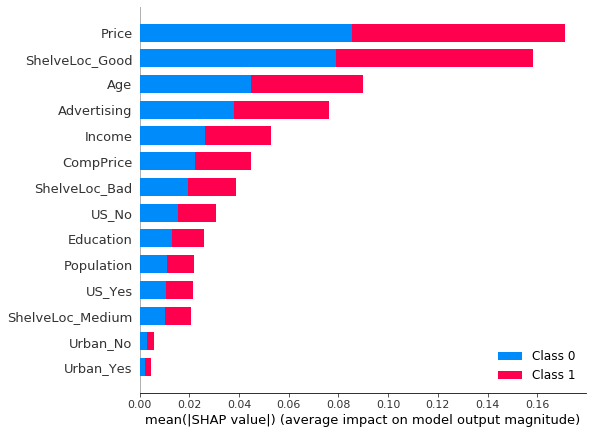

In [28]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

# segment or attributes causes high sale are

1.Price
2.Shelf location at stores
3.Advertising
4.Age